## 신경망
# MNIST 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

### MNIST

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
X_train[0][10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

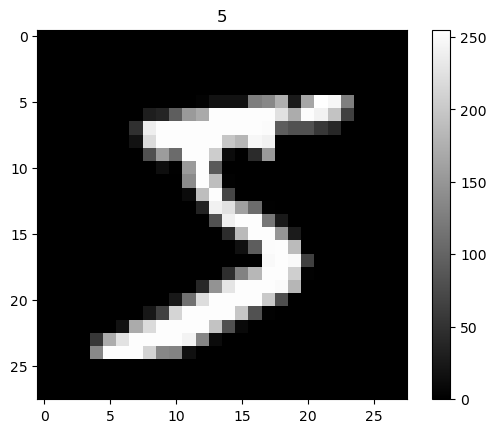

In [9]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.colorbar()

In [6]:
X_train.max(), X_train.min() # 이미지 데이터는 밝기이다. 정수일 경우 0~255 이다

(255, 0)

In [10]:
np.bincount(y_train) # 각 숫자별 이미지 갯수 확인

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

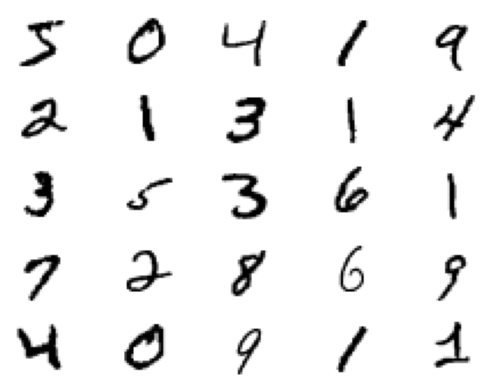

In [11]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.axis('off')

### 데이터 전처리
- 입력값을 1차원 데이터로 변환
- 입력값을 0 ~ 255 정수값에서 0.0 ~ 1.0 실수값으로 변환
- 목표값을 원핫인코딩(one-hot-encoding) 적용

In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
X_train = X_train.reshape(60000, 28*28)/255
X_test = X_test.reshape(10000, 28*28)/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [15]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [16]:
### 원핫인코딩
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [17]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### 단순분류 적용

<img src='https://mmlind.github.io/images/1lnn_input.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)
> 그림에서 픽셀 갯수가 잘못 표기됨 (784가 맞음)

<img src='https://mmlind.github.io/images/1lnn_nnlayer.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 픽셀 수가 784 이므로 속성 갯수가 784인 경우이다.
- w1, w2, w3, ..., w784, b
- w1\*x1 + w2\*x2 + ... + w784\*x784 + b

<img src='https://mmlind.github.io/images/1lnn.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 타겟 클래스가 10개이므로, 가중치와 절편이 그 만큼 늘어난다.
- 클래스값 0 => w1_1, w2_1, ..., w784_1, b1
- 클래스값 1 -> w1_2, w2_2, ..., w784_2, b2
- 가중치갯수 = 784\*10, 절편갯수 = 10

<img src='https://mmlind.github.io/images/1lnn_full.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 소프트맥스 분류기
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6QRL4yW5p4j634dzSyjZWMWWCGXaU_MZVnqDq_HErnH5RCCIizQ' />
(출처 : https://www.google.com/search?tbm=isch&sa=1&ei=VFNCXfrICcybmAWZw6_ACQ&q=mnist+softmax&oq=mnist+softmax&gs_l=img.3..0i24l3.528.3330..3872...0.0..1.585.3193.0j1j5j2j1j1......0....1..gws-wiz-img.uKr_Bjki0oA&ved=0ahUKEwj6wvvf1ODjAhXMDaYKHZnhC5gQ4dUDCAY&uact=5#imgrc=Bwc55tfbS2SjXM:)

<img src='https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg' />
(출처: https://www.youtube.com/watch?v=lvNdl7yg4Pg)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='softmax')) # 중간층 없음

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [20]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5180 - acc: 0.8681 - val_loss: 0.3332 - val_acc: 0.9071
Epoch 2/20
1407/1407 [==============================] - 1s 998us/step - loss: 0.3189 - acc: 0.9123 - val_loss: 0.2997 - val_acc: 0.9171
Epoch 3/20
1407/1407 [==============================] - 1s 997us/step - loss: 0.2932 - acc: 0.9181 - val_loss: 0.2910 - val_acc: 0.9189
Epoch 4/20
1407/1407 [==============================] - 1s 1ms/step - loss: 0.2805 - acc: 0.9212 - val_loss: 0.2809 - val_acc: 0.9228
Epoch 5/20
1407/1407 [==============================] - 1s 990us/step - loss: 0.2726 - acc: 0.9227 - val_loss: 0.2809 - val_acc: 0.9234
Epoch 6/20
1407/1407 [==============================] - 1s 1ms/step - loss: 0.2667 - acc: 0.9246 - val_loss: 0.2780 - val_acc: 0.9240
Epoch 7/20
1407/1407 [==============================] - 1s 1ms/step - loss: 0.2623 - acc: 0.9258 - val_loss: 0.2750 - val_acc: 0.9245
Epoch 8/20
1407/1407 [==============================] - 

In [21]:
h = model.history.history

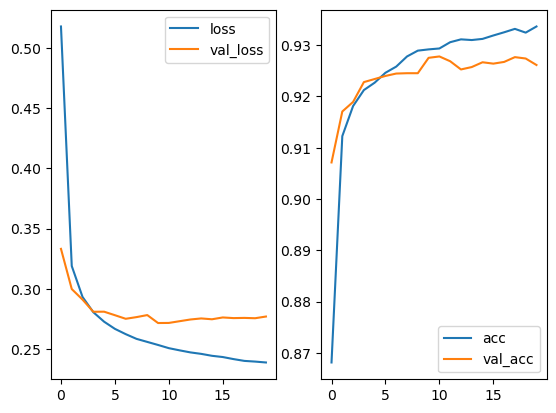

In [22]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

### 중간층 추가

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [25]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2952 - acc: 0.9153 - val_loss: 0.1612 - val_acc: 0.9530
Epoch 2/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1236 - acc: 0.9624 - val_loss: 0.1132 - val_acc: 0.9649
Epoch 3/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.0878 - acc: 0.9726 - val_loss: 0.1166 - val_acc: 0.9639
Epoch 4/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.0650 - acc: 0.9800 - val_loss: 0.1028 - val_acc: 0.9687
Epoch 5/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.0506 - acc: 0.9845 - val_loss: 0.1245 - val_acc: 0.9645
Epoch 6/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.0398 - acc: 0.9870 - val_loss: 0.1064 - val_acc: 0.9714
Epoch 7/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0334 - acc: 0.9890 - val_loss: 0.1061 - val_acc: 0.9726
Epoch 8/20
1407/1407 [==============================] - 2s 2ms

In [26]:
h = model.history.history

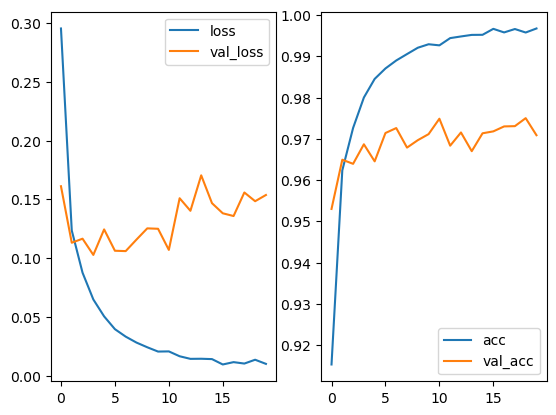

In [27]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

### 틀린 그림 찾기

In [28]:
y_pred = model.predict(X_test)
y_pred.shape

313/313 [==============================] - 0s 737us/step


(10000, 10)

In [29]:
y_pred.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
(y_pred.argmax(axis=1) == y_test.argmax(axis=1)).mean() # 테스트 데이터에 대한 정확도

0.9702

In [24]:
y_pred[:5]

array([[6.2548396e-14, 1.2520337e-12, 3.2863092e-09, 4.1656165e-08,
        6.6042363e-21, 5.3950664e-13, 1.3131817e-23, 1.0000000e+00,
        4.4445042e-12, 1.0308845e-10],
       [5.6452895e-19, 4.1938554e-15, 1.0000000e+00, 6.7616336e-11,
        1.3852462e-23, 1.3305023e-23, 8.3268188e-20, 1.0353778e-24,
        1.4977310e-12, 4.7828523e-22],
       [5.5072702e-09, 9.9996746e-01, 1.2530132e-06, 1.0080653e-09,
        2.3912537e-05, 1.1045396e-14, 1.3856211e-12, 1.2682315e-07,
        7.1770660e-06, 3.6581412e-11],
       [1.0000000e+00, 4.9289715e-16, 4.2916995e-10, 7.5068621e-19,
        3.2054476e-12, 1.1893848e-13, 4.1293621e-08, 2.3657668e-13,
        9.1296850e-14, 7.3617572e-17],
       [4.7346351e-15, 1.9051869e-16, 8.7370093e-15, 2.3514192e-21,
        9.9999976e-01, 5.9855676e-17, 1.9327013e-14, 1.2985331e-09,
        3.8691184e-16, 1.9745976e-07]], dtype=float32)

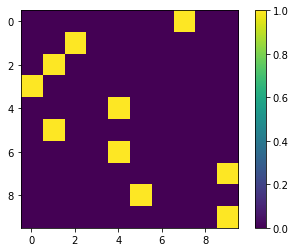

In [25]:
plt.imshow(y_pred[:10])
plt.colorbar()

In [26]:
y_pred.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
np.where(y_test.argmax(axis=1) != y_pred.argmax(axis=1))

(array([ 104,  247,  321,  340,  381,  445,  448,  495,  543,  551,  582,
         610,  659,  684,  691,  707,  717,  720,  740,  810,  900,  947,
         951,  959, 1003, 1014, 1039, 1044, 1107, 1112, 1156, 1178, 1181,
        1194, 1224, 1226, 1232, 1242, 1247, 1253, 1319, 1326, 1328, 1395,
        1433, 1494, 1500, 1522, 1527, 1530, 1549, 1553, 1621, 1626, 1678,
        1717, 1748, 1751, 1754, 1790, 1800, 1828, 1878, 1901, 1909, 1911,
        1941, 1952, 2004, 2016, 2035, 2043, 2052, 2053, 2109, 2118, 2129,
        2130, 2135, 2148, 2224, 2266, 2291, 2293, 2369, 2387, 2395, 2406,
        2514, 2515, 2526, 2573, 2582, 2607, 2648, 2654, 2730, 2810, 2877,
        2915, 2927, 2930, 2939, 3005, 3030, 3055, 3073, 3117, 3289, 3405,
        3474, 3490, 3503, 3520, 3533, 3549, 3558, 3565, 3604, 3702, 3751,
        3755, 3757, 3776, 3780, 3808, 3838, 3853, 3855, 3893, 3926, 3941,
        3943, 3946, 3985, 4007, 4065, 4078, 4140, 4156, 4163, 4176, 4199,
        4201, 4224, 4248, 4271, 4289, 

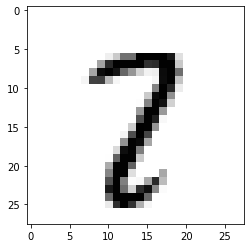

In [35]:
plt.imshow(X_test[321].reshape(28,28), cmap='gray_r')

### 가중치 분석

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [38]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5143 - acc: 0.8694 - val_loss: 0.3322 - val_acc: 0.9080
Epoch 2/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3196 - acc: 0.9115 - val_loss: 0.2991 - val_acc: 0.9171
Epoch 3/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2935 - acc: 0.9182 - val_loss: 0.2873 - val_acc: 0.9204
Epoch 4/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2811 - acc: 0.9214 - val_loss: 0.2821 - val_acc: 0.9224
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2734 - acc: 0.9228 - val_loss: 0.2785 - val_acc: 0.9239
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2663 - acc: 0.9251 - val_loss: 0.2774 - val_acc: 0.9237
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2626 - acc: 0.9258 - val_loss: 0.2758 - val_acc: 0.9245
Epoch 8/20
1407/1407 [==============================] - 5s 4ms

In [39]:
model.get_weights()

[array([[-0.01977374,  0.08602177,  0.0384858 , ...,  0.03378581,
          0.0092383 , -0.03867587],
        [-0.04561049,  0.05429187, -0.05943358, ..., -0.04385522,
         -0.0355657 ,  0.05980461],
        [ 0.02954212,  0.00695567,  0.04293666, ...,  0.02445624,
          0.02980348,  0.00280638],
        ...,
        [-0.07283738,  0.04613157, -0.04102124, ..., -0.03980257,
         -0.04942749, -0.05003568],
        [ 0.01935305,  0.00366054, -0.07495663, ...,  0.06604183,
         -0.02013005,  0.08152942],
        [ 0.08340233, -0.0370483 ,  0.02494787, ...,  0.04669165,
         -0.04803345,  0.001367  ]], dtype=float32),
 array([-0.5374613 ,  0.7991133 ,  0.11413027, -0.4283544 ,  0.21551318,
         1.6151154 , -0.26821116,  0.8964113 , -1.8044087 , -0.43935677],
       dtype=float32)]

In [40]:
W = model.get_weights()[0]
W.shape

(784, 10)

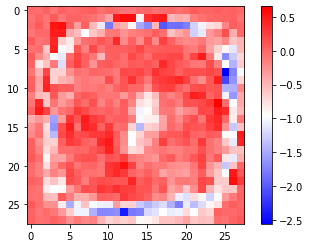

In [46]:
plt.imshow(W[:,0].reshape(28,28), cmap='bwr')
plt.colorbar()

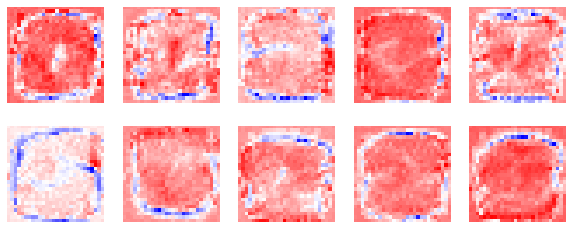

In [45]:
plt.figure(figsize=[10,4])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(W[:,i].reshape(28,28), cmap='bwr')
    plt.axis('off')